In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer

In [2]:
data = pd.read_csv("oasis_longitudinal.csv")

In [3]:
# ubaci srednju vrijednost godina tamo gdje nedostaje ta informacija
data.loc[data.SES.isna(),'SES'] = data.loc[:,'SES'].median()

# izbaci zapise s nedostajućom vrijednosti značajke MMSE
data = data.loc[data.MMSE.notnull(), :]

In [4]:
from scipy.stats import zscore
import numpy as np

# Assuming 'data' is your DataFrame
z_scores_educ = zscore(data['MMSE'])

# Identify outliers based on a z-score threshold of 3
outliers_educ = (np.abs(z_scores_educ) > 3)

# Print the indices of rows where outliers occur
print("Indices of rows with outliers:")
print(np.where(outliers_educ)[0])

# Print the actual rows with outliers
print("Rows with outliers:")
print(data[outliers_educ])


Indices of rows with outliers:
[ 26  89 100 101 172 173 251]
Rows with outliers:
    Subject ID         MRI ID     Group  Visit  MR Delay M/F Hand  Age  EDUC  \
26   OAS2_0014  OAS2_0014_MR2  Demented      2       504   M    R   77    16   
89   OAS2_0044  OAS2_0044_MR2  Demented      2       352   M    R   69    14   
100  OAS2_0048  OAS2_0048_MR4  Demented      4       970   M    R   68    16   
101  OAS2_0048  OAS2_0048_MR5  Demented      5      1233   M    R   69    16   
172  OAS2_0079  OAS2_0079_MR2  Demented      2       584   F    R   71    12   
173  OAS2_0079  OAS2_0079_MR3  Demented      3      1435   F    R   73    12   
251  OAS2_0120  OAS2_0120_MR2  Demented      2       595   F    R   78    14   

     SES  MMSE  CDR  eTIV   nWBV    ASF  
26   3.0  16.0  1.0  1590  0.696  1.104  
89   4.0  15.0  1.0  1331  0.678  1.318  
100  1.0   7.0  1.0  1714  0.682  1.024  
101  1.0   4.0  1.0  1701  0.676  1.032  
172  4.0  16.0  1.0  1492  0.725  1.176  
173  4.0  16.0  1.0  1478 

In [5]:
#data = pd.read_csv("obradeni_podaci.csv")
data

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,2.0,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [6]:
data = data.groupby('Subject ID').first().reset_index()

In [7]:
#NOVE ZNAČAJKE
data['eTIV_nWBV_Ratio'] = data['eTIV'] / data['nWBV']
data['Education_MMSE'] = data['EDUC'] * data['MMSE']
data['BrainVolume_Education_Ratio'] = data['eTIV'] / data['EDUC']

In [8]:
data.nunique()

Subject ID                     150
MRI ID                         150
Group                            3
Visit                            1
MR Delay                         1
M/F                              2
Hand                             1
Age                             34
EDUC                            12
SES                              5
MMSE                            13
CDR                              3
eTIV                           131
nWBV                            90
ASF                            129
eTIV_nWBV_Ratio                149
Education_MMSE                  55
BrainVolume_Education_Ratio    143
dtype: int64

In [9]:
data['M/F'] = data['M/F'].map({'M': 0, 'F': 1})

In [10]:
data['CDR'] = data['CDR'].replace({0.5: 1})  #sada imamo samo dvije klase
selected_features = ['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF','eTIV_nWBV_Ratio']
#scaler = StandardScaler()

# Dodajte normalizirane značajke u vaš DataFrame
#data[selected_features] = scaler.fit_transform(data[selected_features])
X = data[selected_features]  # Odabir značajki za X
y = data['CDR'] # Varijabla koju želim predviđati


In [11]:
X

,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,eTIV_nWBV_Ratio
0,0,87,14,2.0,27.0,1987,0.696,0.883,2854.885057
1,0,75,12,2.0,23.0,1678,0.736,1.046,2279.891304
2,1,88,18,3.0,28.0,1215,0.710,1.444,1711.267606
3,0,80,12,4.0,28.0,1689,0.712,1.039,2372.191011
4,0,71,16,2.0,28.0,1357,0.748,1.293,1814.171123
...,...,...,...,...,...,...,...,...,...
145,0,73,12,2.0,23.0,1661,0.698,1.056,2379.656160
146,1,66,13,2.0,30.0,1495,0.746,1.174,2004.021448
147,1,72,16,3.0,24.0,1354,0.733,1.296,1847.203274
148,0,80,16,1.0,28.0,1704,0.711,1.030,2396.624473


In [12]:
# Normalizacija/standardizacija značajki
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

MIA KOD-RANDOM FOREST

In [14]:
def cross_check_RF(X_train, X_test, y_train, y_test):
    train_error = []
    test_error = []
    best = 1
    best_depth = 0
    for depth in range(1, 16):
        model_random_forest = RandomForestClassifier(max_depth=depth).fit(X_train, y_train.reshape(1, -1).flatten())
        train_err = 1-accuracy_score(y_train.reshape(1, -1).flatten(), model_random_forest.predict(X_train))
        test_err = 1-accuracy_score(y_test.reshape(1, -1).flatten(), model_random_forest.predict(X_test))
        train_error.append(train_err)
        test_error.append(test_err)
        
        if test_err < best:
            best_depth = depth
        
    return train_error, test_error, best_depth

15


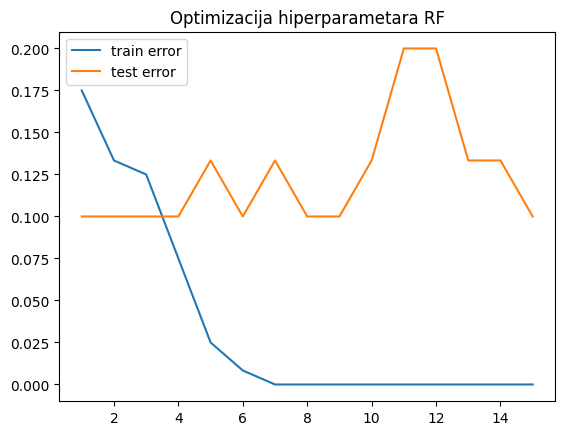

In [15]:
train_err, test_err, best_depth = cross_check_RF(X_train, X_test, y_train, y_test)
print(best_depth)

plt.plot(range(1, 16), train_err, label=f'train error')
plt.plot(range(1, 16), test_err, label=f'test error')
plt.title("Optimizacija hiperparametara RF")
plt.legend(loc = 'best')

In [16]:
def train_rand_forest(X_train, X_test, y_train, y_test, max_depth=None, num_of_classes=2):
    
    model = RandomForestClassifier(max_depth=max_depth).fit(X_train, y_train)
    
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    
    # Cross-validation
    cv_results = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f'Cross-Validation Accuracy (Random Forest): {np.mean(cv_results)}')

    acc = accuracy_score(y_test, model.predict(X_test))
    print(f'accuracy: {acc}')

    conf_matrix = confusion_matrix(y_test, model.predict(X_test))
    print(f'confusion matrix:\n{conf_matrix}\n')
    
    # ROC Curve for binary classification
    if len(set(y_test)) == 2:
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        roc_auc = auc(fpr, tpr)
        display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
        display.plot()
        plt.show()

Cross-Validation Accuracy (Random Forest): 0.8533333333333333
accuracy: 0.8333333333333334
confusion matrix:
[[17  5]
 [ 0  8]]



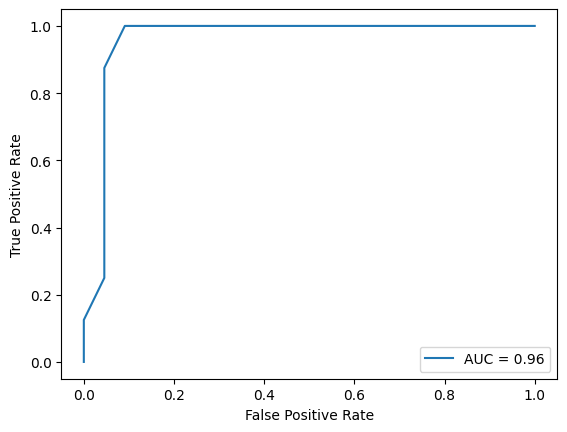

In [17]:
train_rand_forest(X_train, X_test, y_train.ravel(), y_test, max_depth=best_depth)

In [18]:
#PETRIN KOD:
rf_classifier = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    max_depth=None,  # Max depth of trees
    min_samples_leaf=2,  # Minimum samples per leaf
    max_features='sqrt',  # Number of features to consider at each split
    random_state=42  # Setting a random state for reproducibility
)


# Fit the model on your training data
rf_classifier.fit(X_train, y_train)
predictions_rf = rf_classifier.predict(X_test)


accuracy_rf = rf_classifier.score(X_test, y_test)
print(f"Accuracy: {accuracy_rf}")
f1_rf = f1_score(y_test,predictions_rf,average='micro')
precision_rf = precision_score(y_test,predictions_rf,average='micro')
recall_rf = recall_score(y_test, predictions_rf,average='micro')
print("F1_score: ",f1_rf)
print("Precision : ",precision_rf)
print("Recall : ",recall_rf)

Accuracy: 0.9
F1_score:  0.9
Precision :  0.9
Recall :  0.9


SVM-PETRA

In [19]:
svm_classifier = SVC(kernel='linear', probability=True)  # You can specify the kernel type ('linear', 'rbf', 'poly', etc.)
svm_classifier.fit(X_train, y_train)
# Making predictions on the test set using the best estimator
y_predict_svm = svm_classifier.predict(X_test)

# Calculating accuracy
accuracy_svm = accuracy_score(y_test, y_predict_svm)
print(f"Accuracy: {accuracy_svm}")

Accuracy: 0.8


SVM-MIA

param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly']}
grid_search = GridSearchCV(SVC(), param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)

In [20]:

def cross_check_SVM(X_train, X_test, y_train, y_test):
    train_error = []
    test_error = []
    best = 1
    best_depth = 0
    for depth in range(1, 16):
        model_random_forest = RandomForestClassifier(max_depth=depth).fit(X_train, y_train.reshape(1, -1).flatten())
        train_err = 1-accuracy_score(y_train.reshape(1, -1).flatten(), model_random_forest.predict(X_train))
        test_err = 1-accuracy_score(y_test.reshape(1, -1).flatten(), model_random_forest.predict(X_test))
        train_error.append(train_err)
        test_error.append(test_err)
        
        if test_err < best:
            best_depth = depth
        
    return train_error, test_error, best_depth

def train_svm(X_train, X_test, y_train, y_test, kernel="linear", C=0.1, num_folds=10):
    model = SVC(kernel=kernel, C=C, probability=True).fit(X_train, y_train)
    
    cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
    
    # Cross-validation
    cv_results = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    print(f'Cross-Validation Accuracy (SVM): {np.mean(cv_results)}')

    acc = accuracy_score(y_test, model.predict(X_test))
    print(f'Accuracy (SVM): {acc}')

    conf_matrix = confusion_matrix(y_test, model.predict(X_test))
    print(f'Confusion Matrix (SVM):\n{conf_matrix}\n')

    # ROC Curve for binary classification
    if len(set(y_test)) == 2:
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        roc_auc = auc(fpr, tpr)
        display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
        display.plot()
        plt.show()


Cross-Validation Accuracy (SVM): 0.8083333333333332
Accuracy (SVM): 0.9333333333333333
Confusion Matrix (SVM):
[[20  2]
 [ 0  8]]



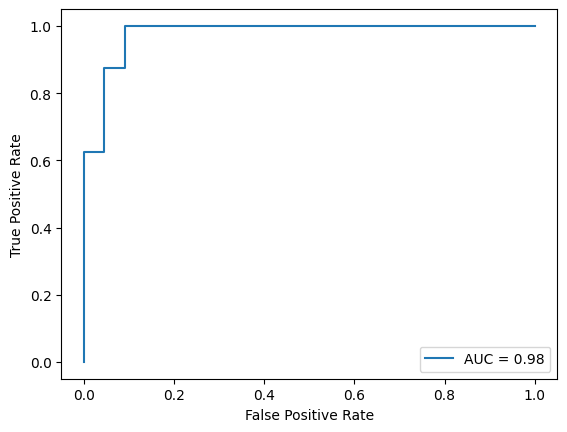

In [21]:
train_svm(X_train, X_test, y_train, y_test)

VOTING-MIA

In [22]:
def train_voting(X_train, X_test, y_train, y_test, num_folds=10):
    rf_model = RandomForestClassifier(max_depth=10)
    svm_model = SVC(kernel="linear", C=0.1, probability=True)
    xgb_model = XGBClassifier()
    df_model = DecisionTreeClassifier()

    voting_model = VotingClassifier(estimators=[
        ('rf', rf_model),
        ('svm', svm_model),
        ('xgb', xgb_model),
        ('df', df_model )
    ], voting='soft').fit(X_train, y_train)
    
    cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
    
    # Cross-validation
    cv_results = cross_val_score(voting_model, X_train, y_train, cv=cv, scoring='accuracy')
    print(f'Cross-Validation Accuracy (Voting): {np.mean(cv_results)}')

    acc = accuracy_score(y_test, voting_model.predict(X_test))
    print(f'Accuracy (Voting): {acc}')

    conf_matrix = confusion_matrix(y_test, voting_model.predict(X_test))
    print(f'Confusion Matrix (Voting):\n{conf_matrix}\n')

    # ROC Curve for binary classification
    if len(set(y_test)) == 2:
        fpr, tpr, _ = roc_curve(y_test, voting_model.predict_proba(X_test)[:, 1])
        roc_auc = auc(fpr, tpr)
        display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
        display.plot()
        plt.show()

Cross-Validation Accuracy (Voting): 0.8
Accuracy (Voting): 0.8666666666666667
Confusion Matrix (Voting):
[[18  4]
 [ 0  8]]



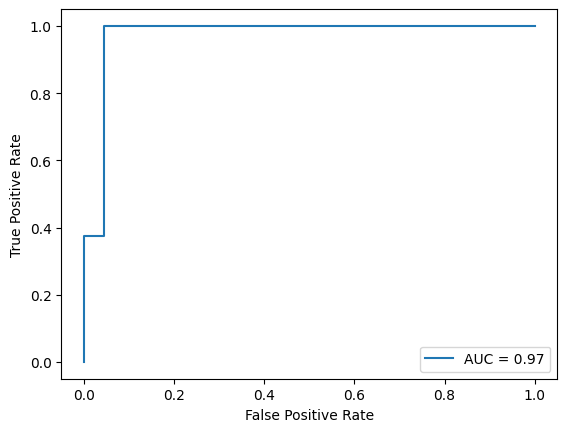

In [23]:
train_voting(X_train, X_test, y_train, y_test)

LOGISTIC REGRESSION

In [132]:
from sklearn.model_selection import GridSearchCV

# Create a logistic regression model
logreg_model = LogisticRegression(max_iter=2000)

# Define the parameter grid
param_grid = {'C': [10**-2, 1, 10**2]}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(logreg_model, param_grid, cv=5)  # Adjust cv as needed
grid_search.fit(X_train, y_train.ravel())

# Get the best model and print results
best_model = grid_search.best_estimator_
best_accuracy = accuracy_score(y_test, best_model.predict(X_test))

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Accuracy: {best_accuracy}')


Best Parameters: {'C': 1}
Best Accuracy: 0.8666666666666667
